# Modelo predictivo utilizando técnicas de reducción dimensional para predecir el valor de venta de una casa.

In [ ]:

# La base de datos House_price.csv contiene información de casas. La idea
# es obtener un modelo que permita predecir el valor de venta de una casa.
# Las variables son las siguientes:

# LotFrontage: Pies lineales de calle conectados a la propiedad
# LotArea: Tamaño del lote en pies cuadrados
# MasVnrArea: Área de revestimiento de mampostería en pies cuadrados
# BsmtFinSF1: Pies cuadrados del sótano terminados tipo 1
# BsmtFinSF2: Pies cuadrados con del sótano acabados tipo 2
# BsmtUnfSF: Pies cuadrados sin terminar de área del sótano
# TotalBsmtSF: Total de pies cuadrados de área del sótano
# 1stFlrSF: Pies cuadrados del primer piso
# 2ndFlrSF: Pies cuadrados del segundo piso
# LowQualFinSF: Pies cuadrados con acabado de baja calidad (todos los pisos)
# GrLivArea: Pies cuadrados de área habitable sobre el nivel (suelo)
# GarageArea: Tamaño del garaje en pies cuadrados
# WoodDeckSF: Área de la plataforma de madera en pies cuadrados
# OpenPorchSF: Área del porche abierto en pies cuadrados
# EnclosedPorch: Área del porche cerrado en pies cuadrados
# 3SsnPorch: área de porche de tres estaciones en pies cuadrados
# ScreenPorch: Área del porche de la pantalla en pies cuadrados
# PoolArea: Área de la piscina en pies cuadrados
# MiscVal: Valor de la función miscelánea
# SalePrice: el precio de venta de la propiedad en dólares. Esta es la
# variable objetivo que se quiere modelar.



In [1]:
# a) Cargue la base de datos, ¿hay alguna columna que no sea útil para el
# análisis?. Revise si existen casos faltantes en la base de datos, según la
# descripción de las variables, ¿qué pudiera significar un NA? Tome
# decisiones de qué hacer si existen casos faltantes. Si desea imputar los
# valores nulos de alguna variable por un valor puede utilizar
# data["columna"].fillna('valor', inplace = True).

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import time

data = pd.read_csv("House_price.csv", sep=";")
data.head()
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   MasVnrArea     1452 non-null   float64
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinSF2     1460 non-null   int64  
 6   BsmtUnfSF      1460 non-null   int64  
 7   TotalBsmtSF    1460 non-null   int64  
 8   1stFlrSF       1460 non-null   int64  
 9   2ndFlrSF       1460 non-null   int64  
 10  LowQualFinSF   1460 non-null   int64  
 11  GrLivArea      1460 non-null   int64  
 12  GarageArea     1460 non-null   int64  
 13  WoodDeckSF     1460 non-null   int64  
 14  OpenPorchSF    1460 non-null   int64  
 15  EnclosedPorch  1460 non-null   int64  
 16  3SsnPorch      1460 non-null   int64  
 17  ScreenPorch    1460 non-null   int64  
 18  PoolArea

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,421.610009,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,1460.000000,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,...,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


In [2]:
# rellenar datos
data["LotFrontage"].fillna(data["LotFrontage"].mean(), inplace = True)
data["MasVnrArea"].fillna(data["MasVnrArea"].mean(), inplace = True)


#set index
#data.set_index("Id", inplace=True)

data.describe()
data.isnull().sum()


Id               0
LotFrontage      0
LotArea          0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
SalePrice        0
dtype: int64

In [56]:
# b) La variable a modelar corresponde al precio de venta de la casa en
# dólares. En base a los modelos que hemos aprendido en clases, 
# ¿qué modelo(s) podría(n) ser de utilidad para predecir el precio de venta de
# casas mediante las variables predictoras?

# R: el modelo que se puede utilizar es el de regresion lineal multiple, ya que
# se tiene una variable dependiente y varias independientes



In [33]:
# c) Vamos a implementar un modelo de regresión lineal para modelar el
# precio de venta de casas. Considerando que en la base de datos
# tenemos varias variables que dependen de otras, ¿cuál pudiera ser el
# problema que surgiría en este contexto? ¿por qué esto es un problema?
# Discuta.


# R: el problema que surge es la multicolinealidad, ya que las variables
# independientes estan correlacionadas entre si, por lo que se debe
# eliminar una de ellas para evitar este problema



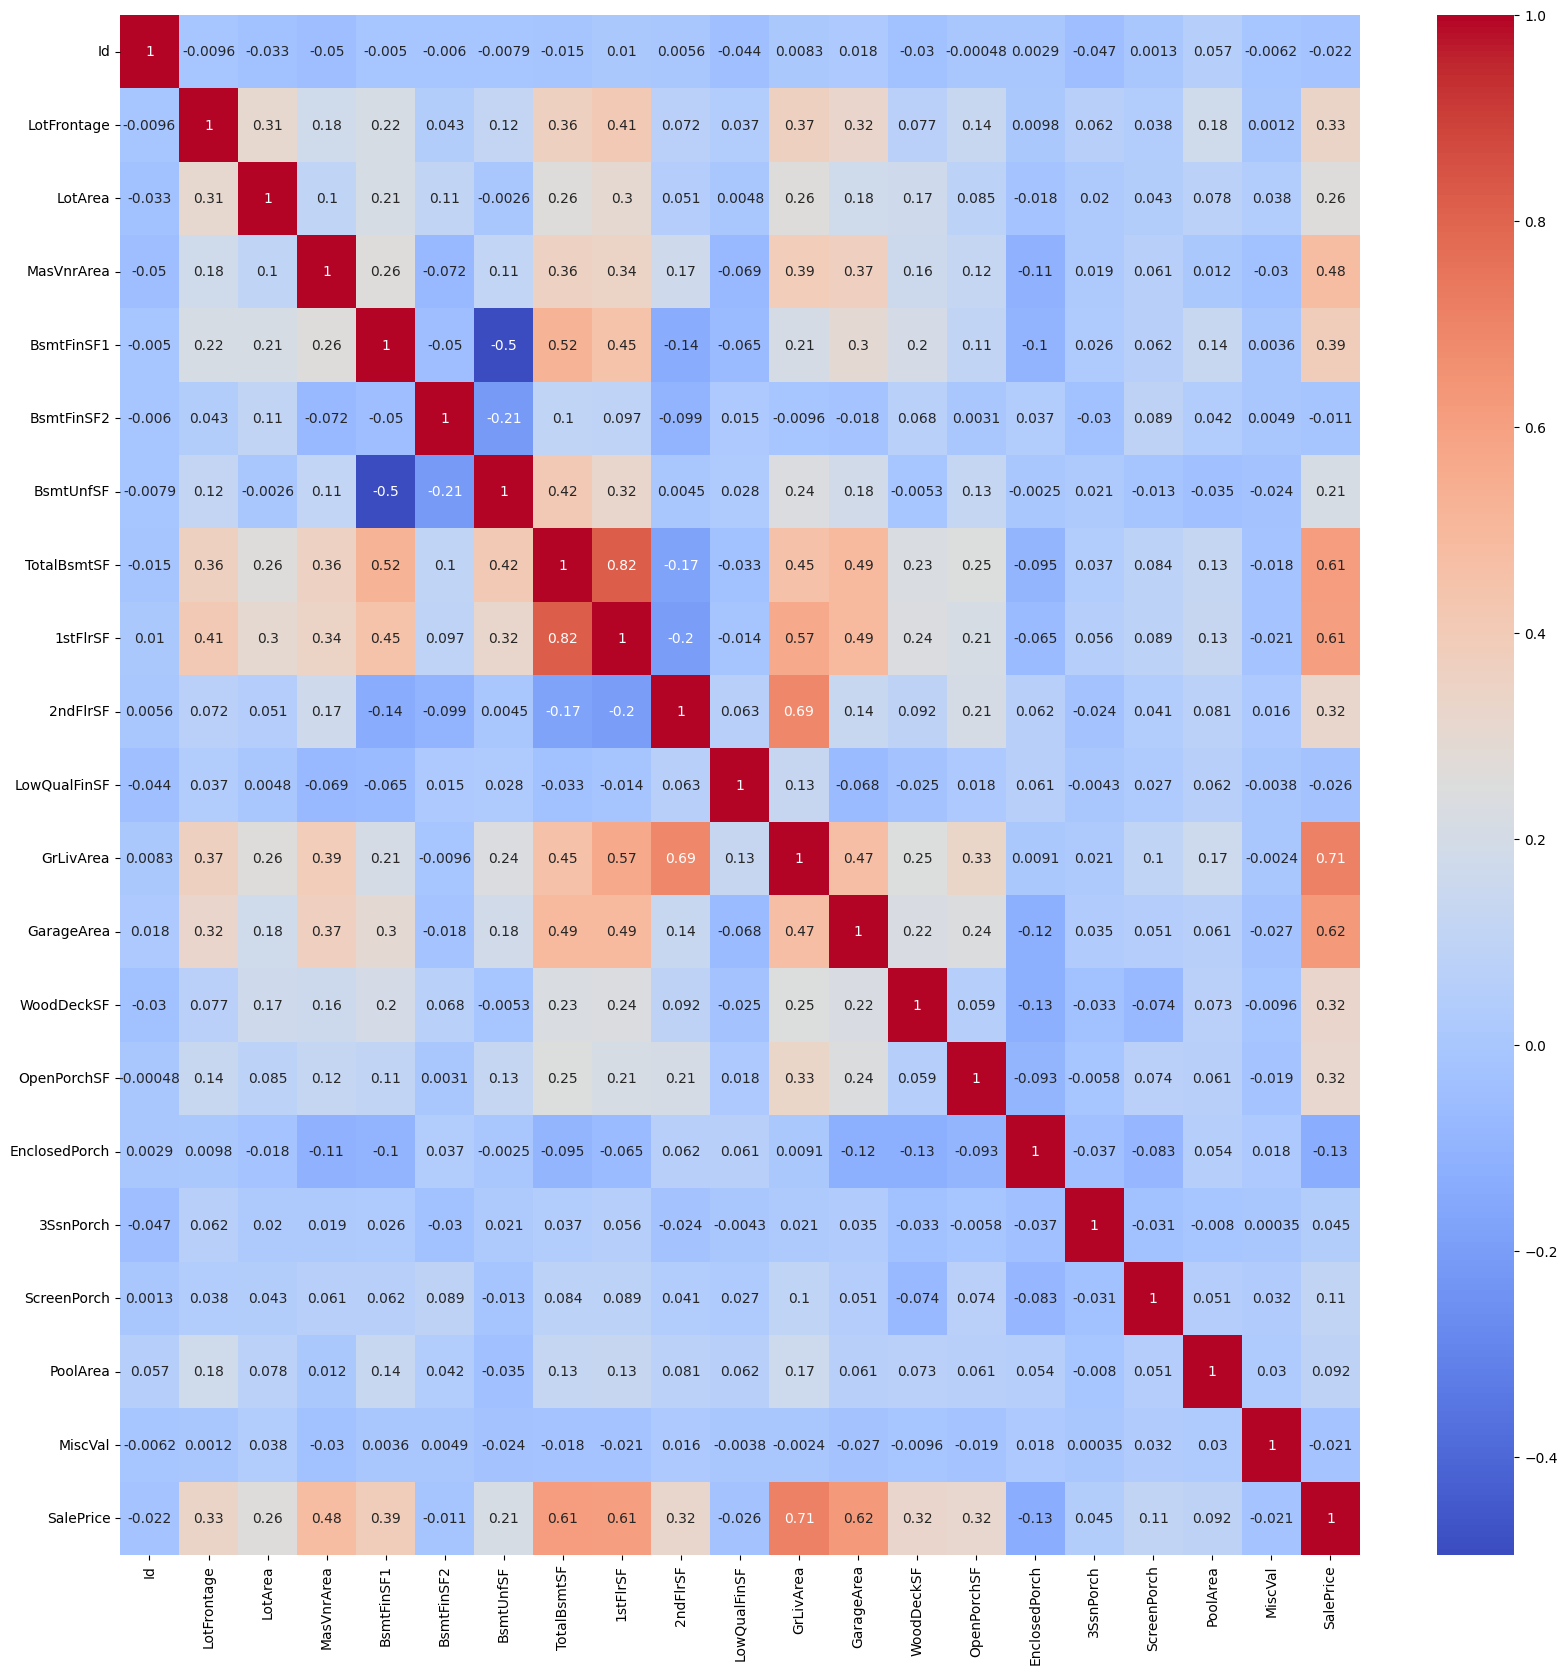

In [3]:
# d) Realice un análisis de la correlación entre las variables. Comente,
# ¿existen variables muy correlacionadas entre sí? 
# ¿Por qué cree que # ocurre?

# calcular correlacion
corr = data.corr()
corr

# graficar correlacion
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

# R: si existen variables muy correlacionadas entre si, por ejemplo
# TotalBsmtSF y 1stFlrSF, GrLivArea y TotRmsAbvGrd, GarageCars y GarageArea,
# entre otras. Esto ocurre porque estas variables estan relacionadas entre si,
# por ejemplo, el tamaño del garaje esta relacionado con el precio de la casa, 
# a mayor tamaño del garaje, mayor precio de la casa.

# Esto ocurre porque estas variables estan directamente relacionadas entre si...



In [4]:
# e) Suponga que este es un problema de gran volumen, donde tenemos
# muchas columnas y registros. Cuando existen variables muy
# correlacionadas el costo computacional para obtener el modelo puede
# ser muy elevado. Obtenga el tiempo de procesamiento para obtener
# una regresión lineal. Para esto, podemos obtener la regresión lineal
# utilizando la función LinearRegression de sklearn.linear_model y
# calcular el tiempo de procesamiento de la siguiente forma:


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from datetime import datetime
start=datetime.now()


# regresion lineal multiple
X = data.drop(["SalePrice"], axis=1)
y = data["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

modelo = LinearRegression()

start_time = time.perf_counter()
modelo.fit(X_train, y_train)
finish_time = time.perf_counter()
print(finish_time - start_time)

y_pred = modelo.predict(X_test)

modelo.score(X_train,y_train)
accuracy = modelo.score(X_test, y_test)
print(accuracy*100,'%')


0.005834799958392978
66.04644871021301 %


In [10]:
# f) Obtenga las componentes principales utilizando las variables
# estandarizadas, si desea explicar un 80% de la variabilidad, 
# ¿cuántas componentes debería elegir? Argumente.

# estandarizar variables
scaler = StandardScaler()
scaler.fit(X)
data_scaled = scaler.transform(X)

# obtener componentes principales

pca = PCA(n_components=0.8) # se debe poner el numero de variables o X.shape[1] total de variables
pca.fit(data_scaled)
data_pca = pca.transform(data_scaled)

n_components = data_pca.shape[1]

print(n_components)

# ¿cuántas componentes debería elegir?
# R. Segun el resultado deberian ser 12 componentes correspondientes a las
# variables que se deben elegir para explicar el 80% de la variabilidad




12


In [13]:
# g) Corra el modelo de regresión lineal con las componentes principales
# como variables predictoras. Vuelva a calcular el tiempo de
# procesamiento. ¿En cuál caso suele demorarse menos? ¿Qué ganamos
# al realizar componentes principales? Concluya.



# regresion lineal multiple
X_train, X_test, y_train, y_test = train_test_split(data_pca, y, test_size=0.8, random_state=42)

modelo = LinearRegression()

start_time = time.perf_counter()
modelo.fit(X_train, y_train)
finish_time = time.perf_counter()
print(finish_time - start_time)


y_pred = modelo.predict(X_test)


modelo.score(X_train,y_train)
accuracy = modelo.score(X_test, y_test)
print(accuracy*100,'%')





0.0026041000382974744
64.70372359834849 %


In [ ]:
# ¿En cuál caso suele demorarse menos?
# R. En el caso de las componentes principales se demora menos.

# ¿Qué ganamos al realizar componentes principales?

# R. Al realizar componentes principales se gana tiempo de procesamiento.

